**PRECOG RECRUITMENT TASK-1**<br>
Name: Ishan Kavathekar <br>
Roll no: 2022121003<br>
FILE: acts_section.csv and cases_2010.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [3]:
data = pd.read_csv('/kaggle/input/precog-acts-sections/acts_sections.csv',dtype = {'ddl_case_id': str},usecols=['ddl_case_id','act','criminal'],chunksize=10000000)
df = pd.concat(data,ignore_index=True)

In [4]:
df

,ddl_case_id,act,criminal
0,06-03-02-210100004042014,17353.0,1
1,23-34-01-229900001012019,4759.0,1
2,13-18-03-204000030972016,17353.0,1
3,23-28-01-220102000232016,4759.0,1
4,01-35-05-203007002652012,17353.0,1
...,...,...,...
76811352,13-25-04-201300000162017,4650.0,0
76811353,13-25-02-201300001002017,10564.0,0
76811354,13-25-02-201300001202017,10564.0,0
76811355,13-25-02-201300000892017,4650.0,0


In [5]:
df = df.sample(n=10000000)

In [6]:
df.isnull().sum()

ddl_case_id       0
act            1463
criminal          0
dtype: int64

In [7]:
df2 = df.dropna(subset=['act'],how='any')

In [8]:
df2.head()

,ddl_case_id,act,criminal
24732484,04-04-09-206601013962012,2476.0,0
58851022,09-38-34-252800001442020,4759.0,1
996058,23-50-02-220100001912020,4759.0,1
26864603,23-26-02-211700000132017,10584.0,0
51490432,04-04-14-202902016662016,17353.0,1


In [9]:
df2.isnull().sum()

ddl_case_id    0
act            0
criminal       0
dtype: int64

In [10]:
cols = ['ddl_case_id','state_code','dist_code','court_no','judge_position','female_defendant','female_petitioner','female_adv_def','female_adv_pet','type_name','purpose_name','disp_name']
cases = pd.read_csv('/kaggle/input/precog-cases/cases_2010.csv',usecols = cols)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998537 entries, 24732484 to 19589457
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ddl_case_id  object 
 1   act          float64
 2   criminal     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 305.1+ MB


In [16]:
df2 = df2.astype({'ddl_case_id':'string'})
cases = cases.astype({'ddl_case_id':'string'})

In [44]:
df_final = pd.merge(cases, df2, on='ddl_case_id', how='left')

In [13]:
# Not using currently
cols2 = ['ddl_case_id','state_code','dist_code','court_no','judge_position','female_defendant','female_petitioner','female_adv_def','female_adv_pet','type_name','purpose_name','disp_name']
cases2 = pd.read_csv('/kaggle/input/precog-cases/cases_2011.csv',usecols = cols2)

In [45]:
df_final.isnull().sum()

ddl_case_id                0
state_code                 0
dist_code                  0
court_no                   0
judge_position             0
female_defendant           0
female_petitioner          0
female_adv_def             0
female_adv_pet             0
type_name                  0
purpose_name          254130
disp_name                  0
act                  3995821
criminal             3995821
dtype: int64

In [46]:
df_final.shape

(4281327, 14)

In [47]:
df_final.head()

,ddl_case_id,state_code,dist_code,court_no,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,act,criminal
0,01-01-01-200308002162010,1,1,1,chief judicial magistrate,0 male,1 female,0,-9998,790,5228.0,42,NaN,NaN
1,01-01-01-200707000172010,1,1,1,chief judicial magistrate,-9998 unclear,1 female,-9999,0,2587,3627.0,42,NaN,NaN
2,01-01-01-200707000182010,1,1,1,chief judicial magistrate,-9998 unclear,-9998 unclear,-9999,0,2587,3627.0,42,NaN,NaN
3,01-01-01-200707000192010,1,1,1,chief judicial magistrate,-9998 unclear,1 female,-9999,0,2587,3627.0,42,NaN,NaN
4,01-01-01-200707000202010,1,1,1,chief judicial magistrate,-9998 unclear,-9998 unclear,-9999,0,2587,3627.0,42,NaN,NaN


In [48]:
df_final = df_final.fillna(df_final.mode())
df_final = df_final.drop_duplicates()
df_final = df_final.dropna()

In [49]:
df_final['female_defendant'] = df_final['female_defendant'].replace('0 male','0')
df_final['female_defendant'] = df_final['female_defendant'].replace('1 female','1')
df_final['female_defendant'] = df_final['female_defendant'].replace('-9998 unclear','-9998')
df_final['female_defendant'] = df_final['female_defendant'].replace('-9999 missing name','-9999')

In [50]:
df_final['female_petitioner'] = df_final['female_petitioner'].replace('0 male','0')
df_final['female_petitioner'] = df_final['female_petitioner'].replace('1 female','1')
df_final['female_petitioner'] = df_final['female_petitioner'].replace('-9998 unclear','-9998')
df_final['female_petitioner'] = df_final['female_petitioner'].replace('-9999 missing name','-9999')

In [51]:
df_final = df_final.loc[(df_final['female_adv_def'] != -9999) & (df_final['female_adv_def'] != -9998)]
df_final = df_final.loc[(df_final['female_adv_pet'] != -9999) & (df_final['female_adv_pet'] != -9998)]
df_final = df_final.loc[(df_final['female_defendant'] != -9999) & (df_final['female_defendant'] != -9998)]
df_final = df_final.loc[(df_final['female_petitioner'] != -9999) & (df_final['female_petitioner'] != -9998)]

In [52]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df_final['judge_position'] = enc.fit_transform(df_final[['judge_position']])

In [53]:
df_final.head()

,ddl_case_id,state_code,dist_code,court_no,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,act,criminal
70,01-01-01-201908000692010,1,1,1,65.0,-9998,0,0,0,1429,2237.0,25,4759.0,1.0
88,01-01-01-201908000892010,1,1,1,65.0,0,1,0,0,1429,1963.0,25,4759.0,1.0
111,01-01-01-201908001122010,1,1,1,65.0,0,1,0,0,1429,3734.0,51,4759.0,1.0
112,01-01-01-201908001132010,1,1,1,65.0,-9998,0,0,0,1429,2237.0,25,4759.0,1.0
131,01-01-01-201908001322010,1,1,1,65.0,-9998,1,0,0,1429,2237.0,25,4759.0,1.0


In [54]:
df_final = df_final.loc[(df_final['female_defendant'] != '-9999') & (df_final['female_defendant'] != '-9998')]
df_final = df_final.loc[(df_final['female_petitioner'] != '-9999') & (df_final['female_petitioner'] !='-9998')]

In [55]:
df_final.head()

,ddl_case_id,state_code,dist_code,court_no,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,act,criminal
88,01-01-01-201908000892010,1,1,1,65.0,0,1,0,0,1429,1963.0,25,4759.0,1.0
111,01-01-01-201908001122010,1,1,1,65.0,0,1,0,0,1429,3734.0,51,4759.0,1.0
138,01-01-01-201908001392010,1,1,1,65.0,0,1,0,0,1429,4882.0,15,4759.0,1.0
596,01-01-01-203008002902010,1,1,1,65.0,0,0,1,0,4018,509.0,43,17353.0,1.0
1598,01-01-02-202707000542012,1,1,2,75.0,0,0,1,1,4025,509.0,26,4069.0,0.0


dtype('int64')

In [56]:
df_final = df_final.drop_duplicates()

In [57]:
df_final.head()
# df_final.drop(['criminal'], axis=1)
# X = df_final.drop(['criminal'], axis=1)
# Y = df_final['criminal']

,ddl_case_id,state_code,dist_code,court_no,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,act,criminal
88,01-01-01-201908000892010,1,1,1,65.0,0,1,0,0,1429,1963.0,25,4759.0,1.0
111,01-01-01-201908001122010,1,1,1,65.0,0,1,0,0,1429,3734.0,51,4759.0,1.0
138,01-01-01-201908001392010,1,1,1,65.0,0,1,0,0,1429,4882.0,15,4759.0,1.0
596,01-01-01-203008002902010,1,1,1,65.0,0,0,1,0,4018,509.0,43,17353.0,1.0
1598,01-01-02-202707000542012,1,1,2,75.0,0,0,1,1,4025,509.0,26,4069.0,0.0


In [58]:
type(df_final)

pandas.core.frame.DataFrame

In [61]:
df_final = df_final.drop(['ddl_case_id'], axis=1)

In [62]:
df_final.columns

Index(['state_code', 'dist_code', 'court_no', 'judge_position',
       'female_defendant', 'female_petitioner', 'female_adv_def',
       'female_adv_pet', 'type_name', 'purpose_name', 'disp_name', 'act',
       'criminal'],
      dtype='object')

In [63]:
X = df_final.drop(['criminal'],axis=1)
Y = df_final['criminal']

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=0)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn. naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [68]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

models = ['Logistic Regression','SVM','KNeighbor','Decision Tree','Random Forest','Naive Bayes']
accuracy_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(Y_test,y_pred))
    fpr,tpr,_thresholds = metrics.roc_curve(Y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(Y_test,y_pred))

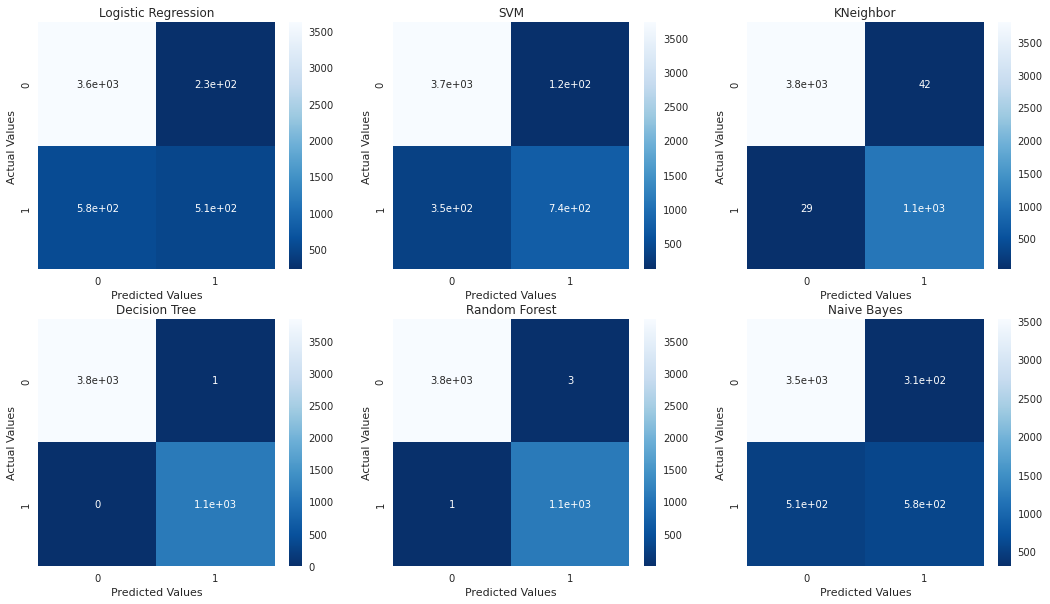

In [70]:
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = models[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True,cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [71]:
result = pd.DataFrame({'model_name':models,'Accuracy':accuracy_list,'AUC':auc_list})
result

,model_name,Accuracy,AUC
0,Logistic Regression,0.836342,0.70
1,SVM,0.906104,0.83
2,KNeighbor,0.985601,0.98
3,Decision Tree,0.999797,1.00
4,Random Forest,0.999189,1.00
5,Naive Bayes,0.833908,0.73
